In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

c:\Kyode\clg\DL_Assignments\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_ds = load_dataset('wmt16', 'de-en', split='train')

Found cached dataset wmt16 (C:/Users/gener/.cache/huggingface/datasets/wmt16/de-en/1.0.0/746749a11d25c02058042da7502d973ff410e73457f3d305fc1177dc0e8c4227)


In [3]:
from tqdm import tqdm

In [4]:
#Visualise the dataset using five different techniques (sequence length, frequency of words, mean token length, word cloud, etc) to show how the 2 languages differ.

In [5]:
train_en_ds = [x['en'] for x in tqdm(train_ds['translation'])]
train_de_ds = [x['de'] for x in tqdm(train_ds['translation'])]

100%|██████████| 4548885/4548885 [00:01<00:00, 3160200.40it/s]


In [6]:
# store sequence lengths in a dataframe

import pandas as pd

df = pd.DataFrame(columns=['en', 'de'])
df['en'] = [len(x.split()) for x in tqdm(train_en_ds)]
df['de'] = [len(x.split()) for x in tqdm(train_de_ds)]

100%|██████████| 4548885/4548885 [00:07<00:00, 574164.29it/s]


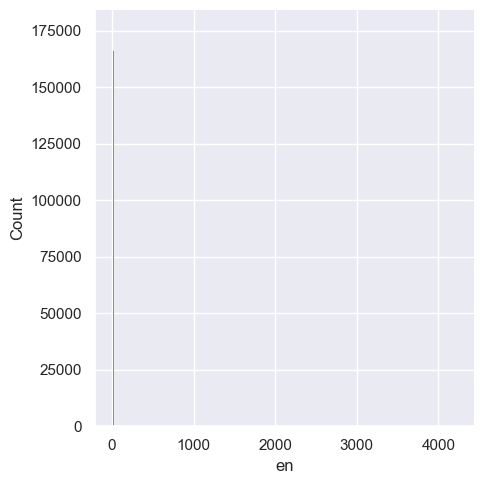

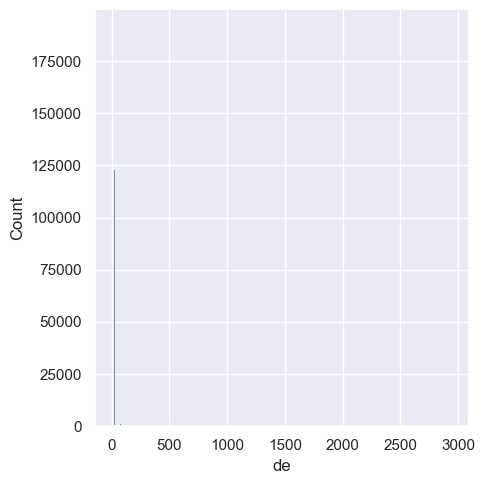

In [10]:
# plot sequence lengths

sns.set_theme(style="darkgrid")
sns.displot(df, x="en", fill=True)
sns.displot(df, x="de", fill=True)

In [5]:
# Frequency of words
from collections import Counter

en_counter = Counter()
for sentence in train_en_ds:
    en_counter.update(sentence.split())

de_counter = Counter()
for sentence in train_de_ds:
    de_counter.update(sentence.split())

print(en_counter.most_common(10))

print(de_counter.most_common(10))

[('the', 6648005), ('of', 3481829), ('and', 3085861), ('to', 2937157), ('in', 2118292), ('a', 1874508), ('is', 1523959), ('that', 1154285), ('for', 1117157), ('on', 841380)]
[('die', 3156285), ('der', 3044311), ('und', 2933148), ('in', 1559122), ('zu', 1155844), ('von', 1089068), ('den', 1080508), ('für', 894625), ('mit', 777083), ('das', 760142)]


In [6]:
# Mean token length
import numpy as np

en_lengths = np.array([len(word) for word in en_counter.keys()])
de_lengths = np.array([len(word) for word in de_counter.keys()])

print(f'English mean token length: {en_lengths.mean()}')
print(f'German mean token length: {de_lengths.mean()}')

English mean token length: 9.159616348596833
German mean token length: 12.019671461133381


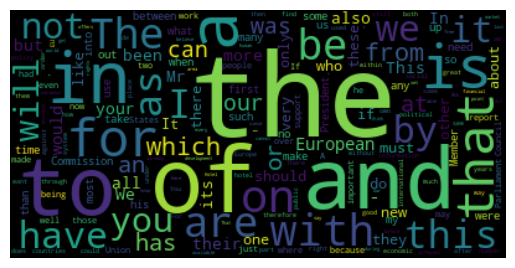

In [7]:
# Word cloud
from wordcloud import WordCloud

en_wordcloud = WordCloud().generate_from_frequencies(en_counter)
plt.imshow(en_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

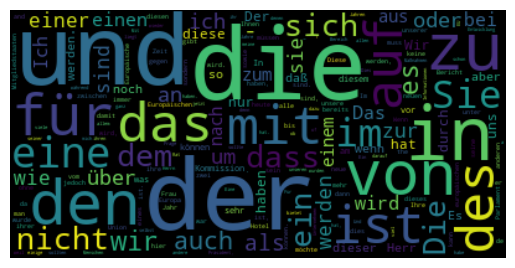

In [8]:
de_wordcloud = WordCloud().generate_from_frequencies(de_counter)
plt.imshow(de_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

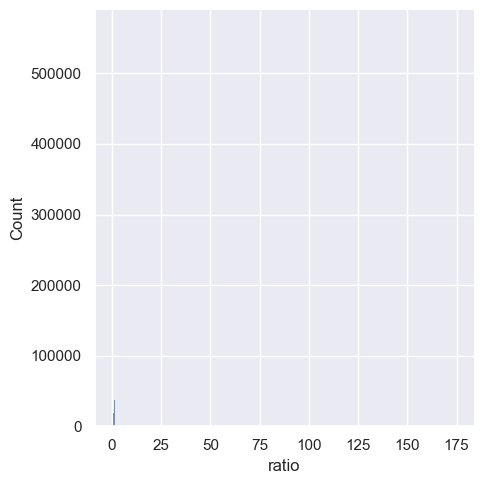

In [11]:
# plot the ratio of source length to the target length

df['ratio'] = df['en'] / df['de']

sns.displot(df, x="ratio", kind = "hist", fill=True)